In [1]:
import numpy as np
import pandas as pd
import os

from bec import *
from monet import *
import al_utils
from pathlib import Path


import warnings
warnings.filterwarnings('ignore')

np.random.seed(69)

In [2]:
def kdv_exact(x,t,k1,c):
    return 0.5*k1**2 / (np.cosh(0.5*(k1 * x - k1**3 * t + c)**2))

x = np.linspace(-20.0, 20.0, 512)
t = np.linspace(0, 50., 300)

X, T = np.meshgrid(x, t)

k1 = 0.5
c = 1

ans = np.array(kdv_exact(np.ravel(X), np.ravel(T), k1, c))
sol = ans.reshape(X.shape)

def data_kdv(x,t,sol):
    df = pd.DataFrame({
    'x' : x,
    'g' : t,
    'psi' : sol
    })
    return df

sample = [ data_kdv(X[i,:],T[i,:],sol[i,:]) for i in range(0,300)]
tr, te, va = make_dataset(sample)
print(f"### Created Train, Test and Validation Sample")

### Created Train, Test and Validation Sample


In [15]:
gp = GPApproximation()
data = tr.sample(500)
gp.fit(data[['x', 'g']], data.psi)
print(f"### Trained GP in train dataset")

### Trained GP in train dataset


In [16]:
def evaluate(gp, sample, low=1, high=100, n=100):
    
    def _evaluate(g):
        gt = get_closest_sim(sample, g)
        pr, pr_sigma = gp.predict(gt[['x', 'g']])
        return ((pr - gt.psi)**2).sum().mean()
    
    return np.array([_evaluate(g) for g in np.linspace(low, high, n)]).mean()

In [17]:
gp_kdv_loss = evaluate(gp, sample, low=50, n=100, high=55)
print(f"### Loss of the trained GP - {gp_kdv_loss}")

### Loss of the trained GP - 0.0027047271422359566


In [18]:
from importlib import reload
reload(al_utils)

<module 'al_utils' from '/home/admin/murugesh/active_learning_phy/scripts/query_gaus_std/al_utils.py'>

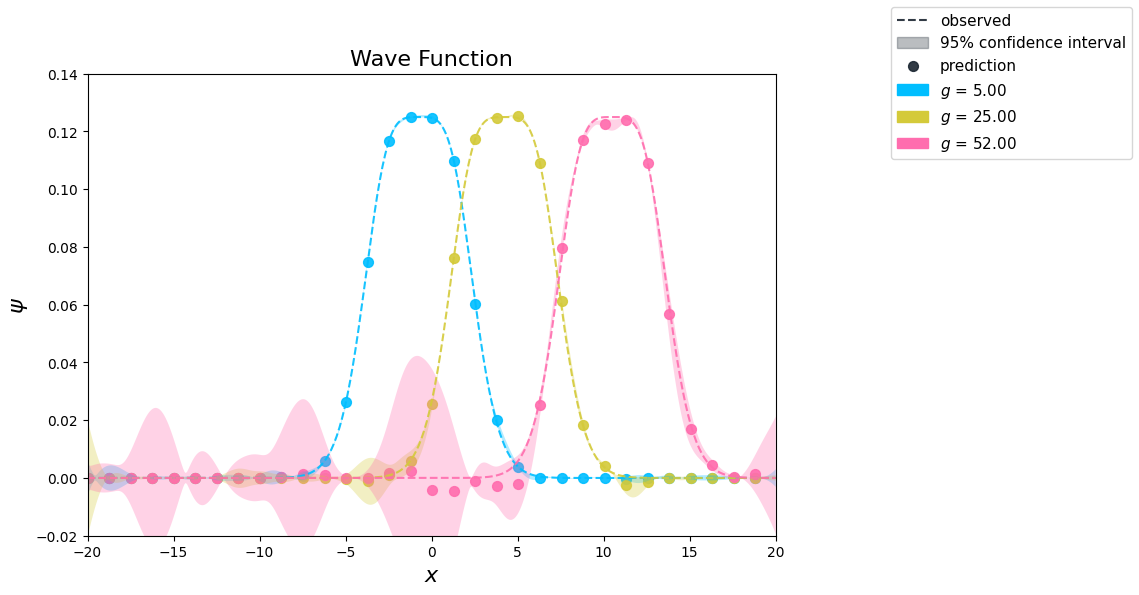

In [19]:
# save_path = "KDV_EXP1"
# if os.path.isdir(save_path) == False:
#     os.mkdir(save_path)
al_utils.plot([5, 25, 52], sample, gp, save_file="KDV_GP.svg", act_op=False, min_gs=-20, max_gs=20)



In [ ]:
print(f"###Starting active learning Process")
kernel = C(1.0, (1e-3, 1e3)) * RBF([5, 5], (1e-2, 1e2))
regressor = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)
ids = [int(i) for i in np.linspace(0, len(tr)-1, 50)]
aclrnr = al_utils.ActLearn(
    regressor=regressor,
    init_ids=ids,
    trn_data=tr,
    save_path=save_path,
    compare_loss=gp_kdv_loss,
    exp_name='KDV'
)

aclrnr.train(sample, low=50, n=100, high=55, gs=[5, 25, 52], min_gs=-20, max_gs=20)



###Starting active learning Process
Loss for 51 - nan
Got min loss
Loss for 52 - 0.4620611056897576
Loss for 53 - 0.46463942432813393
Loss for 54 - 0.46562264756654353
Got min loss
Loss for 55 - 0.10347649776558332
Got min loss
Loss for 56 - 0.04417995847104204
Loss for 57 - 0.04441821027096762
Got min loss
Loss for 58 - 0.04358937162862435
Loss for 59 - 0.044546369632212805
Loss for 60 - 0.06491786259018038
Loss for 61 - 0.05711442955789695
Loss for 62 - 0.05464164740385395
Loss for 63 - 0.051820574109417705
Loss for 64 - 0.052735025794132355
Loss for 65 - 0.05133219503952038
Loss for 66 - 0.05273842165291366
Loss for 67 - 0.053661686329231
Loss for 68 - 0.05298262935902138
Loss for 69 - 0.05255392378467816
Loss for 70 - 0.052980572612526276
Loss for 71 - 0.05916070152975482
Got min loss
Loss for 72 - 0.02475734102780023
Loss for 73 - 0.024899478194929447
Loss for 74 - 0.025292486583119816
Loss for 75 - 0.025002631459242367
Got min loss
Loss for 76 - 0.024631615169362183
Got min loss
